In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [7]:
details = pd.read_csv('order_details.csv')
lists = pd.read_csv('order_lists.csv')

In [8]:
details.head()

,order_id,sales,profit,quantity,category,sub_category,Cost,Total_Cost,Total_profit
0,AZ-2011-1029887,85,15,2,Furniture,Furnishings,70,70,30
1,AZ-2011-1029887,26,7,2,Office Supplies,Labels,19,19,14
2,AZ-2011-107716,294,109,7,Technology,Accessories,185,185,763
3,AZ-2011-1087704,76,11,3,Furniture,Furnishings,65,65,33
4,AZ-2011-1087704,252,15,5,Office Supplies,Binders,237,237,75


In [10]:
lists.head()

,order_id,order_date,customer_name,city,country,region,segment,ship_date,ship_mode,lon,lat
0,AZ-2011-1029887,7/31/2011,Brooke Hodgson,Leipzig,Germany,Central,Consumer,8/3/2011,Economy Plus,12.373075,51.339695
1,AZ-2011-107716,4/11/2011,Corey Norton,Marseille,France,Central,Consumer,4/16/2011,Economy,5.369780,43.296482
2,AZ-2011-1087704,9/15/2011,Elijah Ruatoka,Karlsruhe,Germany,Central,Home Office,9/19/2011,Economy,8.403653,49.006890
3,AZ-2011-1114253,10/18/2011,Amy Pendred,Hamburg,Germany,Central,Consumer,10/22/2011,Economy Plus,9.993682,53.551085
4,AZ-2011-1116129,6/9/2011,Marcus Leon,Munich,Germany,Central,Corporate,6/11/2011,Economy Plus,11.581981,48.135125


In [12]:
# join table
dataset = pd.merge(details, lists, how='right', on='order_id')
dataset.head()

,order_id,sales,profit,quantity,category,sub_category,Cost,Total_Cost,Total_profit,order_date,customer_name,city,country,region,segment,ship_date,ship_mode,lon,lat
0,AZ-2011-1029887,85,15,2,Furniture,Furnishings,70,70,30,7/31/2011,Brooke Hodgson,Leipzig,Germany,Central,Consumer,8/3/2011,Economy Plus,12.373075,51.339695
1,AZ-2011-1029887,26,7,2,Office Supplies,Labels,19,19,14,7/31/2011,Brooke Hodgson,Leipzig,Germany,Central,Consumer,8/3/2011,Economy Plus,12.373075,51.339695
2,AZ-2011-107716,294,109,7,Technology,Accessories,185,185,763,4/11/2011,Corey Norton,Marseille,France,Central,Consumer,4/16/2011,Economy,5.369780,43.296482
3,AZ-2011-1087704,76,11,3,Furniture,Furnishings,65,65,33,9/15/2011,Elijah Ruatoka,Karlsruhe,Germany,Central,Home Office,9/19/2011,Economy,8.403653,49.006890
4,AZ-2011-1087704,252,15,5,Office Supplies,Binders,237,237,75,9/15/2011,Elijah Ruatoka,Karlsruhe,Germany,Central,Home Office,9/19/2011,Economy,8.403653,49.006890


C:\Users\Avalon\AppData\Local\Temp/ipykernel_4020/1502731831.py:1: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``PIL.Image.open(urllib.request.urlopen(url))``.
  img = plt.imread('https://files.ai-pool.com/a/21155149cb560f48f085a21264277c3c.png');


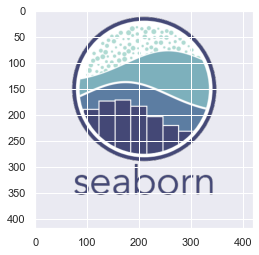

In [16]:
img = plt.imread('https://files.ai-pool.com/a/21155149cb560f48f085a21264277c3c.png');
plt.imshow(img)
plt.show()

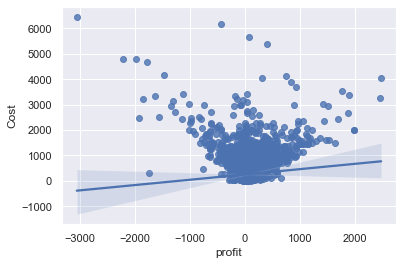

In [17]:
# apakah hubungan biaya dengan profit
sns.regplot(x='profit', y='Cost', data=dataset)
plt.show()

In [19]:
pd.pivot_table(data = dataset, columns='category', index='city')

Cost                            Total_Cost                  \
category  Furniture Office Supplies Technology  Furniture Office Supplies   
city                                                                        
Aachen        736.0       45.833333       36.0      736.0       45.833333   
Aalen         697.0             NaN        NaN      697.0             NaN   
Aalst          32.0       68.000000        NaN       32.0       68.000000   
Abbeville       NaN       69.333333        NaN        NaN       69.333333   
Aberdeen      482.0      124.666667      166.0      482.0      124.666667   
...             ...             ...        ...        ...             ...   
Zamora        239.5      101.750000      486.0      239.5      109.250000   
Zeist         358.0       17.750000      240.0      358.0       17.750000   
Zurich        619.0      132.200000      522.5      619.0      132.200000   
Zwickau         NaN       24.500000        NaN        NaN       24.500000   
Zwolle          NaN      103.000000        NaN        NaN      103.000000   

                     Total_profit                                     lat  \
category  Technology    Furniture Office Supplies   Technology  Furniture   
city                                                                        
Aachen          36.0  1890.000000       35.333333    14.000000  50.775346   
Aalen            NaN   849.000000             NaN          NaN  48.836689   
Aalst            NaN   128.000000      114.000000          NaN  50.937810   
Abbeville        NaN          NaN        4.333333          NaN        NaN   
Aberdeen       166.0   790.000000      189.333333   174.000000  57.149717   
...              ...          ...             ...          ...        ...   
Zamora         486.0   605.000000      276.750000   763.000000  41.503471   
Zeist          240.0  -435.000000      -23.000000  -146.000000  52.090601   
Zurich         522.5  2038.666667      106.600000  1137.166667  47.376887   
Zwickau          NaN          NaN       16.500000          NaN        NaN   
Zwolle           NaN          NaN     -235.500000          NaN        NaN   

           ...        lon      profit                             quantity  \
category   ... Technology   Furniture Office Supplies Technology Furniture   
city       ...                                                               
Aachen     ...   6.083887  315.000000        7.166667       14.0  6.000000   
Aalen      ...        NaN  283.000000             NaN        NaN  3.000000   
Aalst      ...        NaN   32.000000       40.000000        NaN  4.000000   
Abbeville  ...        NaN         NaN        3.333333        NaN       NaN   
Aberdeen   ...  -2.094278  395.000000       24.000000       58.0  2.000000   
...        ...        ...         ...             ...        ...       ...   
Zamora     ...  -5.746788  166.500000       29.750000      140.5  3.000000   
Zeist      ...   5.233253 -145.000000       -6.750000      -73.0  3.000000   
Zurich     ...   8.541694  434.333333       25.850000      205.0  3.666667   
Zwickau    ...        NaN         NaN        5.500000        NaN       NaN   
Zwolle     ...        NaN         NaN      -27.500000        NaN       NaN   

                                            sales                             
category  Office Supplies Technology    Furniture Office Supplies Technology  
city                                                                          
Aachen           3.833333   1.000000  1051.000000       53.000000       50.0  
Aalen                 NaN        NaN   980.000000             NaN        NaN  
Aalst            3.666667        NaN    64.000000      108.000000        NaN  
Abbeville        2.666667        NaN          NaN       72.666667        NaN  
Aberdeen         6.333333   3.000000   877.000000      148.666667      224.0  
...                   ...        ...          ...             ...        ...  
Zamora           4.500000   5.000000   406.000000    

<AxesSubplot:xlabel='count', ylabel='country'>

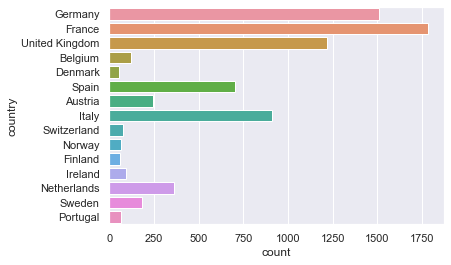

In [21]:
sns.countplot(data=dataset, y='country')

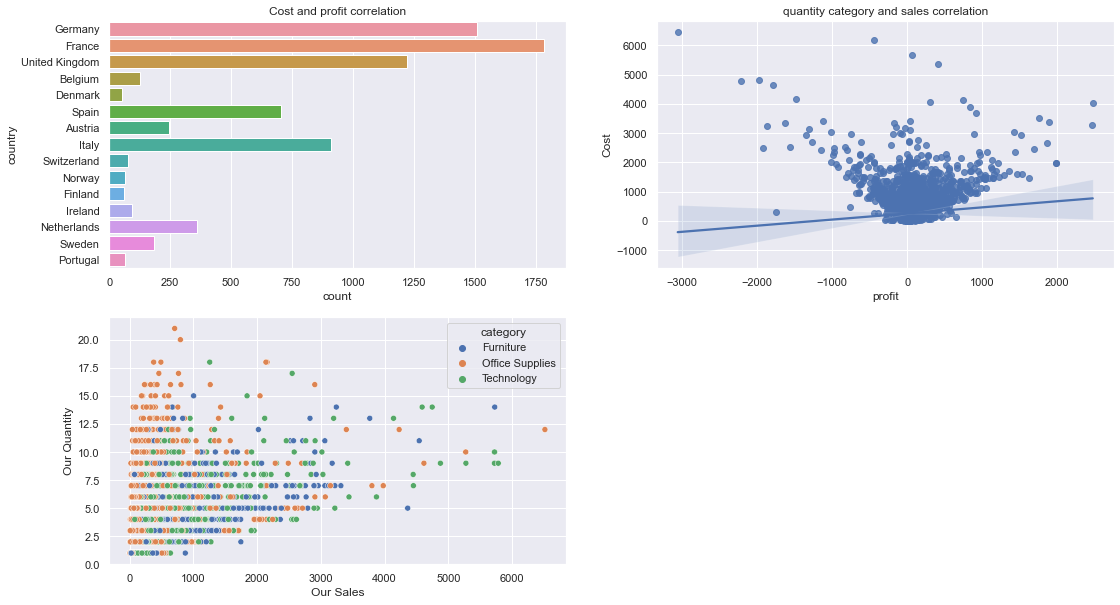

In [41]:
plt.figure(figsize=(18, 10))

plt.title('Transaction in countries')
plt.subplot(2,2,1)
sns.countplot(data=dataset, y='country')

plt.title('Cost and profit correlation')
plt.subplot(2,2,2)
sns.regplot(x='profit', y='Cost', data=dataset)

plt.title('quantity category and sales correlation')
plt.subplot(2,2,3)
sns.scatterplot(data=dataset, x='sales', y='quantity', hue='category')
plt.xlabel('Our Sales')
plt.ylabel('Our Quantity')

plt.show()

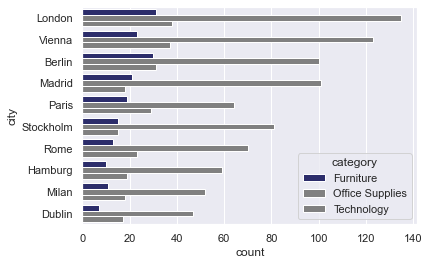

In [46]:
sns.countplot(data=dataset, y='city', hue='category', order=dataset.city.value_counts().iloc[:10].index
            , palette=['#212376', 'grey', 'grey'])
plt.show()

In [47]:
dataset.city.value_counts().index[:10]

Index(['London', 'Vienna', 'Berlin', 'Madrid', 'Paris', 'Stockholm', 'Rome',
       'Hamburg', 'Milan', 'Dublin'],
      dtype='object')

In [49]:
import sweetviz as sv

In [51]:
dataset.head()

,order_id,sales,profit,quantity,category,sub_category,Cost,Total_Cost,Total_profit,order_date,customer_name,city,country,region,segment,ship_date,ship_mode,lon,lat
0,AZ-2011-1029887,85,15,2,Furniture,Furnishings,70,70,30,7/31/2011,Brooke Hodgson,Leipzig,Germany,Central,Consumer,8/3/2011,Economy Plus,12.373075,51.339695
1,AZ-2011-1029887,26,7,2,Office Supplies,Labels,19,19,14,7/31/2011,Brooke Hodgson,Leipzig,Germany,Central,Consumer,8/3/2011,Economy Plus,12.373075,51.339695
2,AZ-2011-107716,294,109,7,Technology,Accessories,185,185,763,4/11/2011,Corey Norton,Marseille,France,Central,Consumer,4/16/2011,Economy,5.369780,43.296482
3,AZ-2011-1087704,76,11,3,Furniture,Furnishings,65,65,33,9/15/2011,Elijah Ruatoka,Karlsruhe,Germany,Central,Home Office,9/19/2011,Economy,8.403653,49.006890
4,AZ-2011-1087704,252,15,5,Office Supplies,Binders,237,237,75,9/15/2011,Elijah Ruatoka,Karlsruhe,Germany,Central,Home Office,9/19/2011,Economy,8.403653,49.006890


In [53]:
df = dataset[['sales', 'profit', 'quantity', 'category', 'country', 'region', 'segment']]
df.head()

,sales,profit,quantity,category,country,region,segment
0,85,15,2,Furniture,Germany,Central,Consumer
1,26,7,2,Office Supplies,Germany,Central,Consumer
2,294,109,7,Technology,France,Central,Consumer
3,76,11,3,Furniture,Germany,Central,Home Office
4,252,15,5,Office Supplies,Germany,Central,Home Office


In [54]:
my_report = sv.analyze(df)

                                             |                                             | [  0%]   00:00 ->…


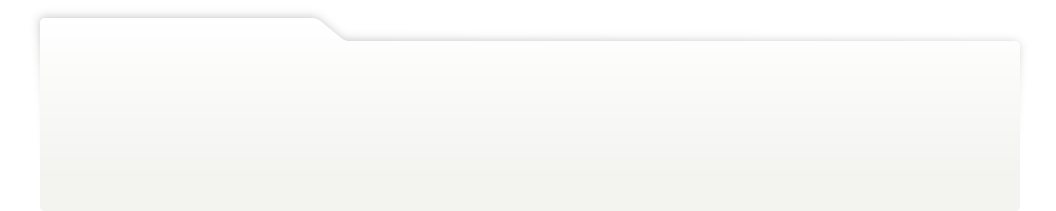
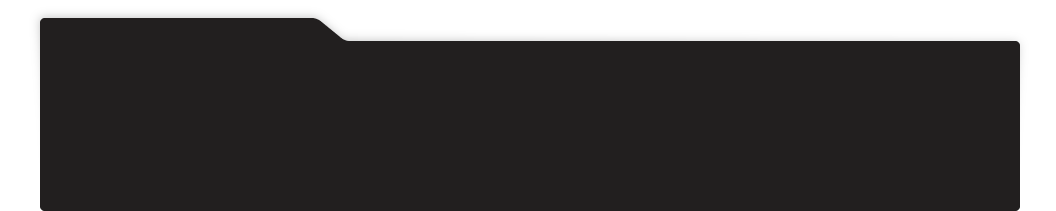
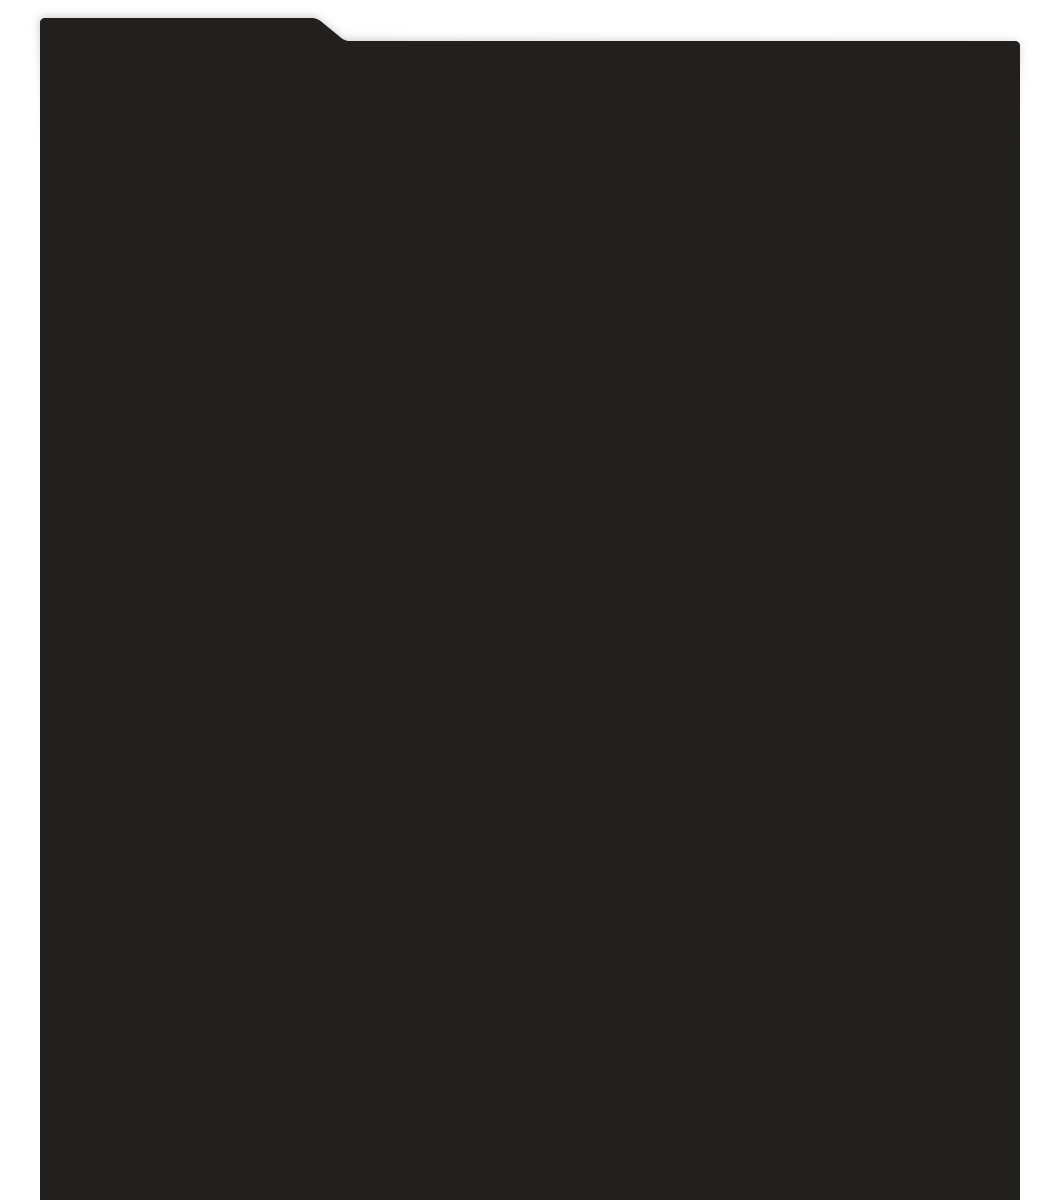
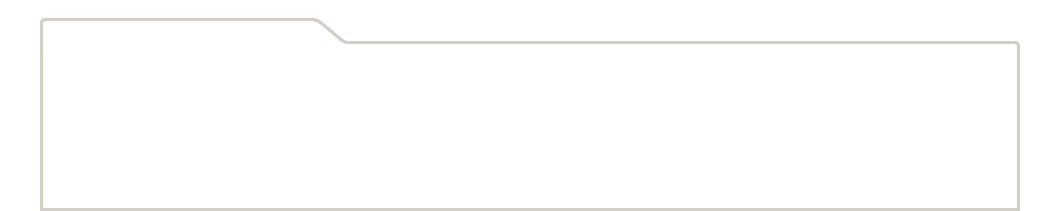
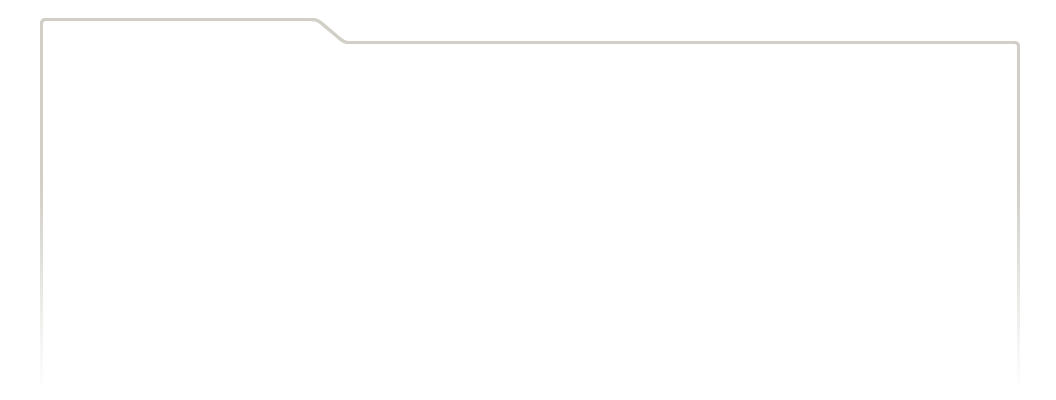
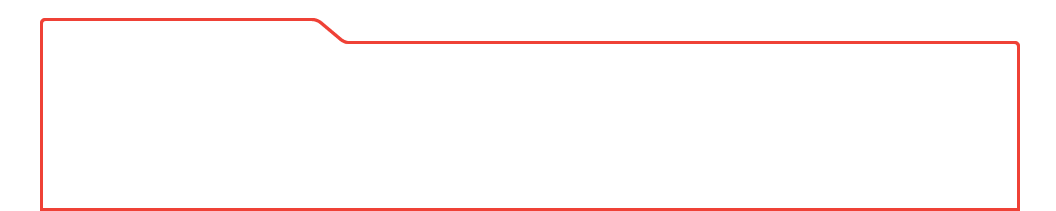
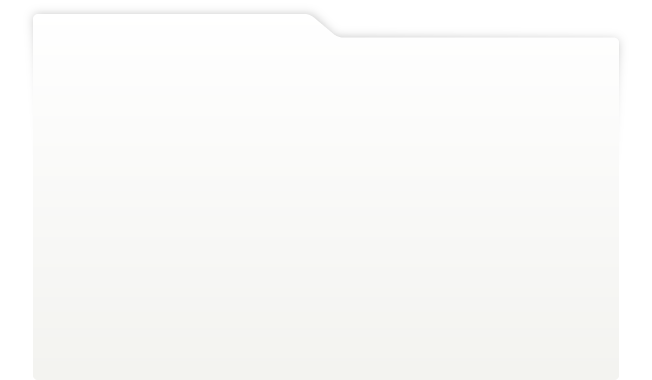
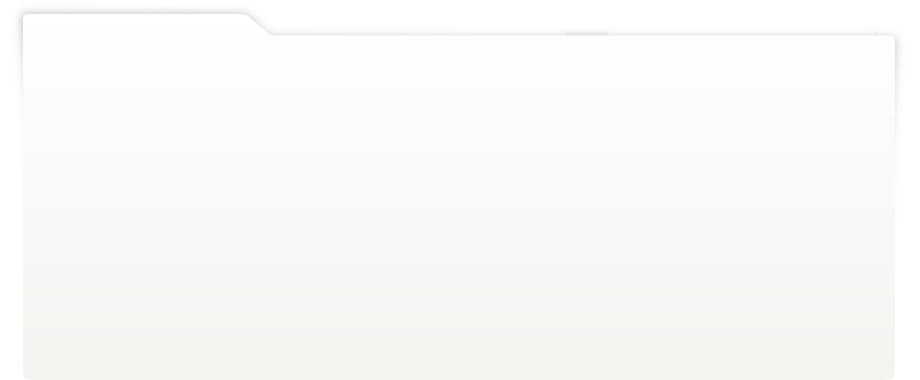
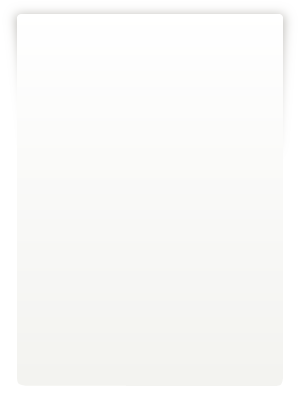
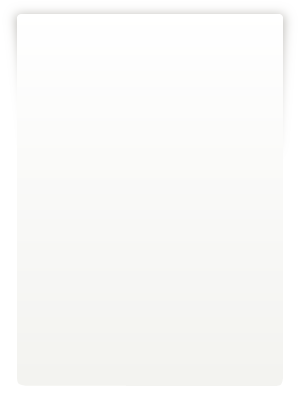
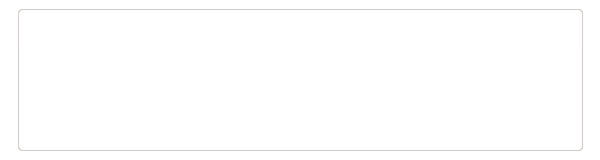
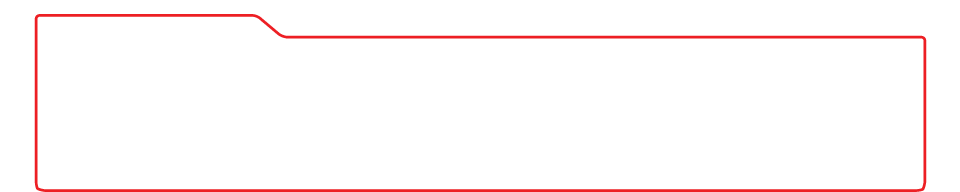
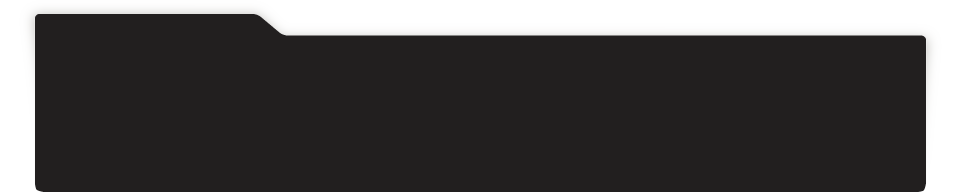
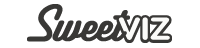
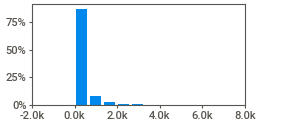
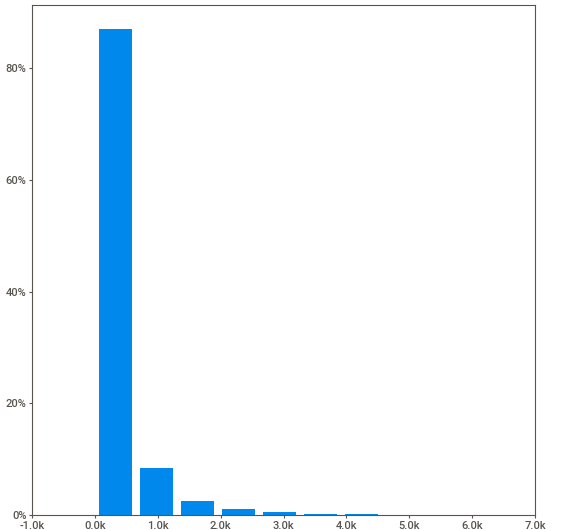
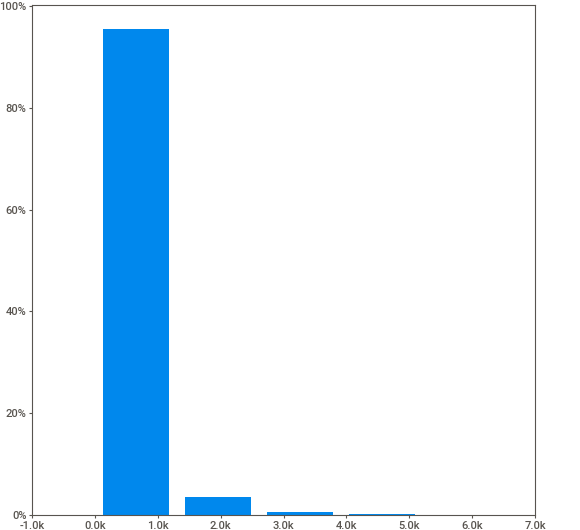
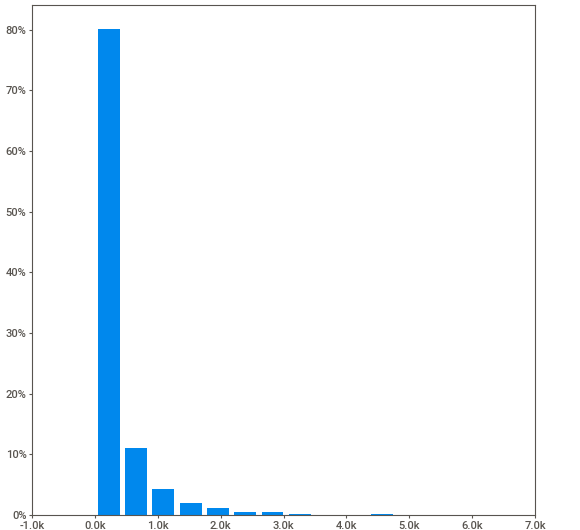
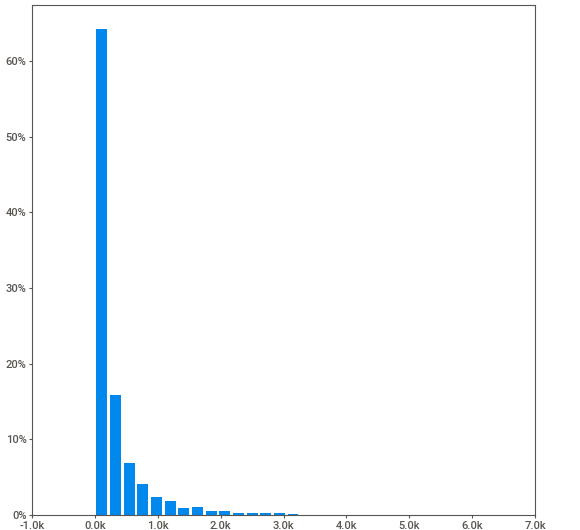
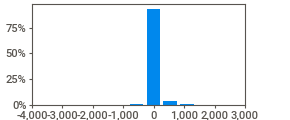
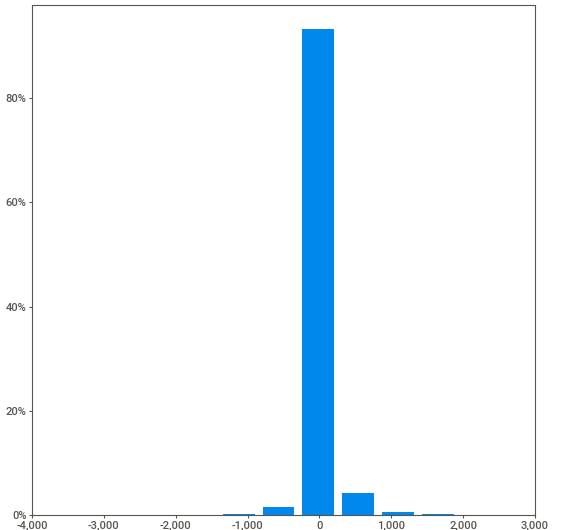
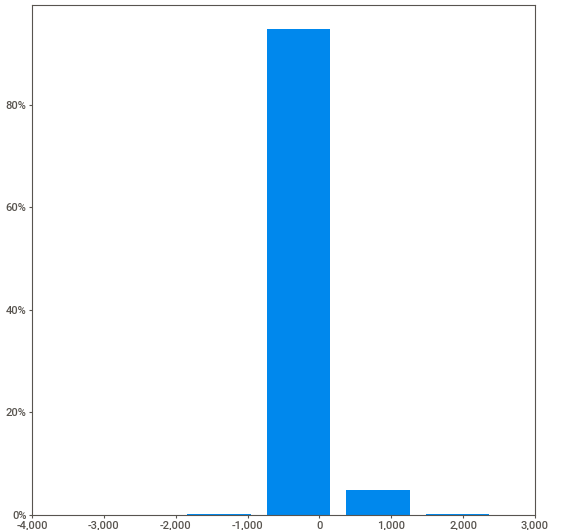
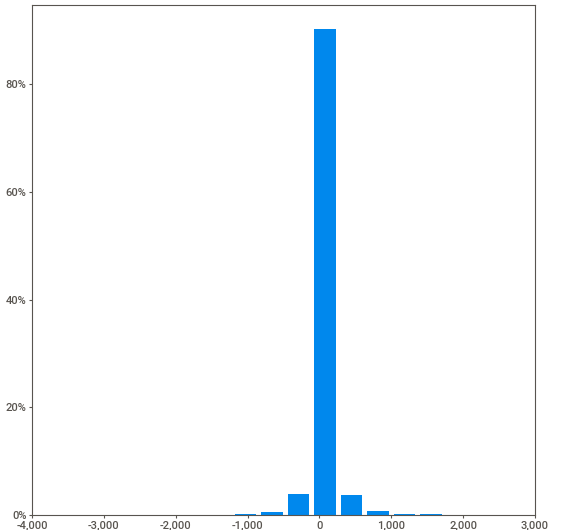
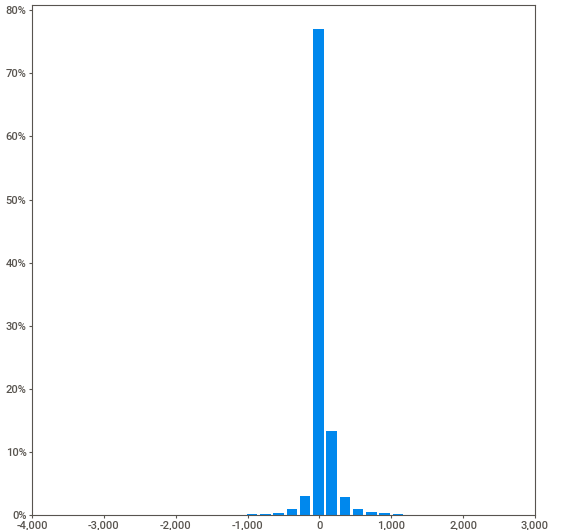
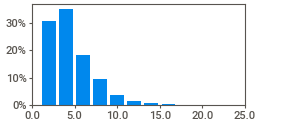
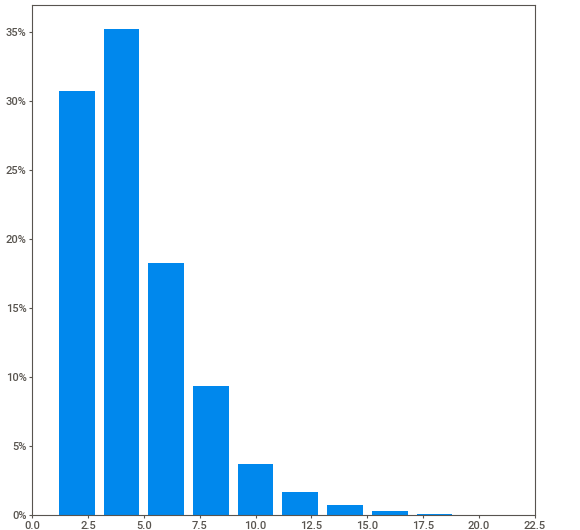
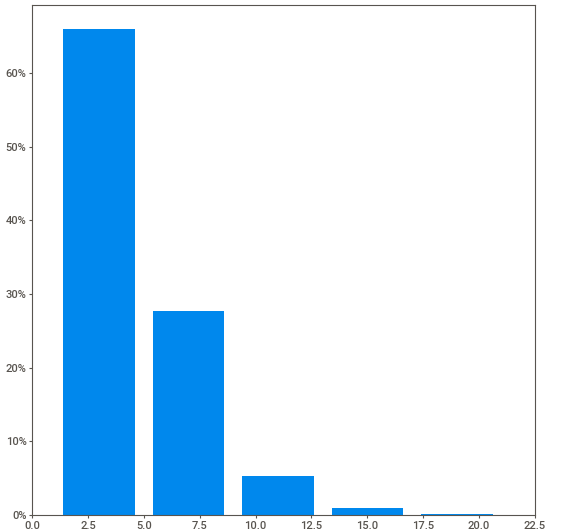
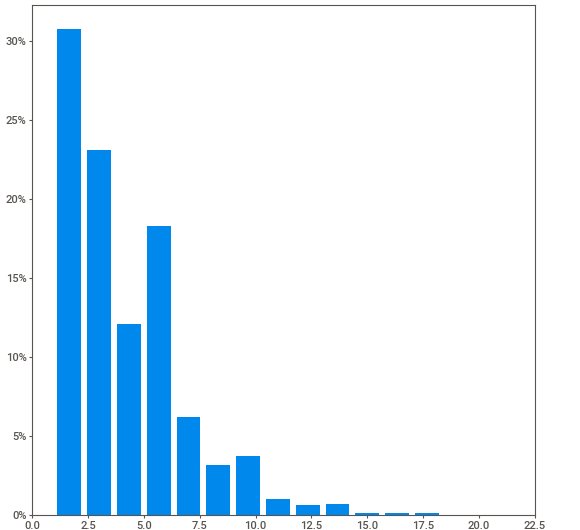
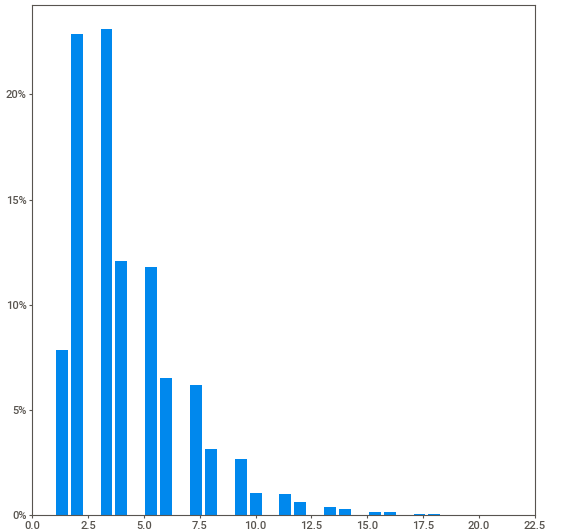
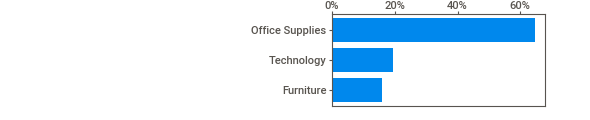
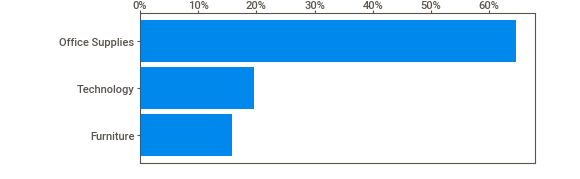
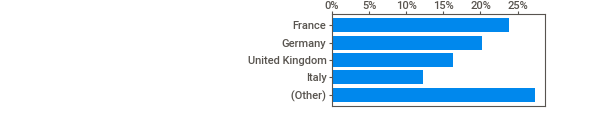
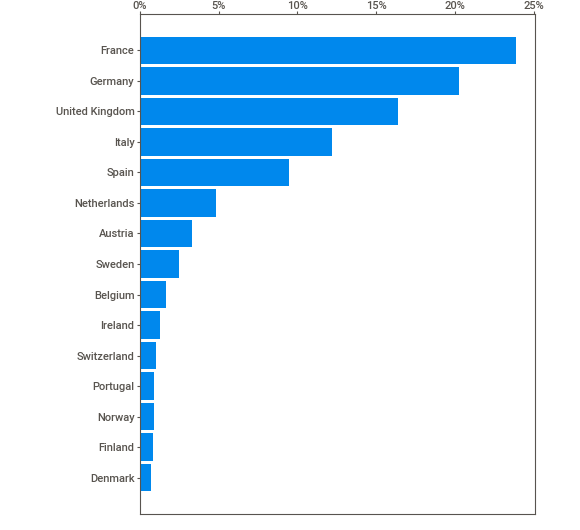
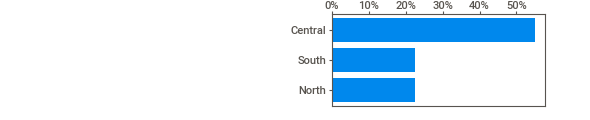
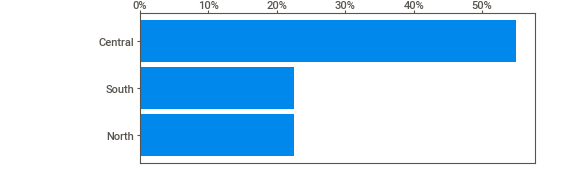
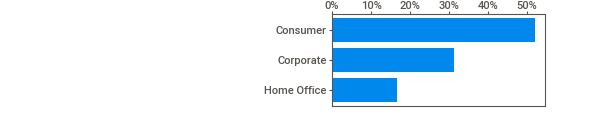
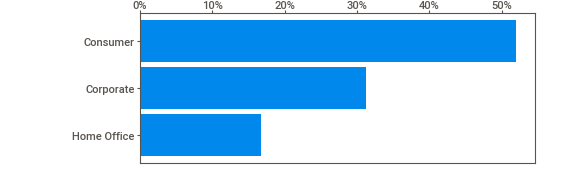
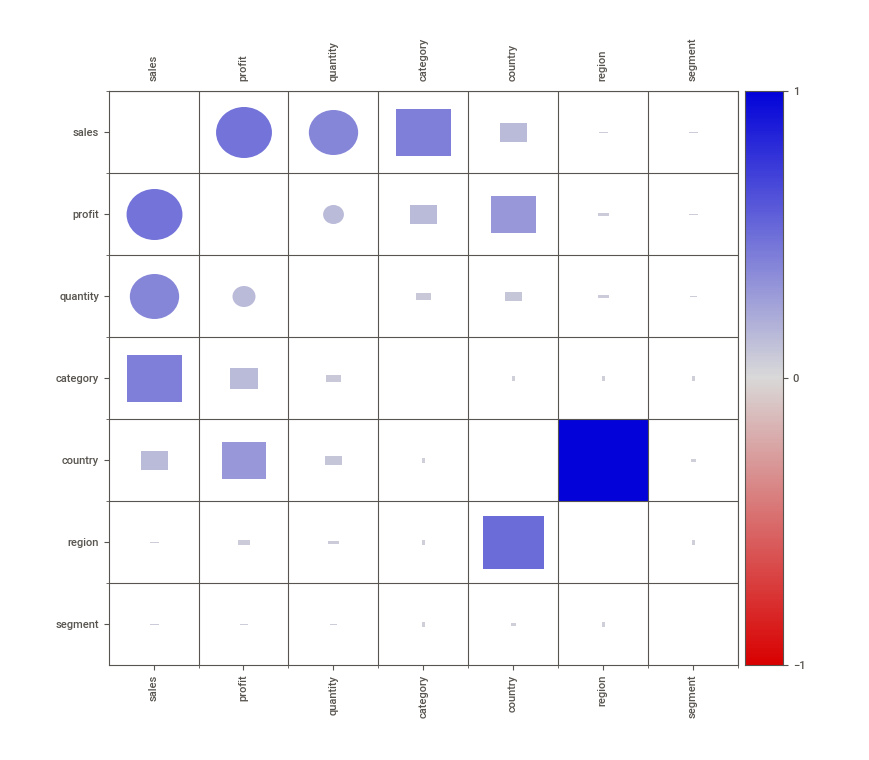
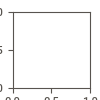

In [57]:
my_report.show_notebook()

In [59]:
df.drop_duplicates().head()

,sales,profit,quantity,category,country,region,segment
0,85,15,2,Furniture,Germany,Central,Consumer
1,26,7,2,Office Supplies,Germany,Central,Consumer
2,294,109,7,Technology,France,Central,Consumer
3,76,11,3,Furniture,Germany,Central,Home Office
4,252,15,5,Office Supplies,Germany,Central,Home Office



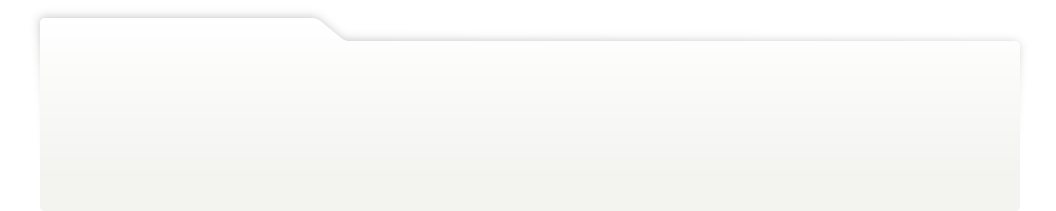
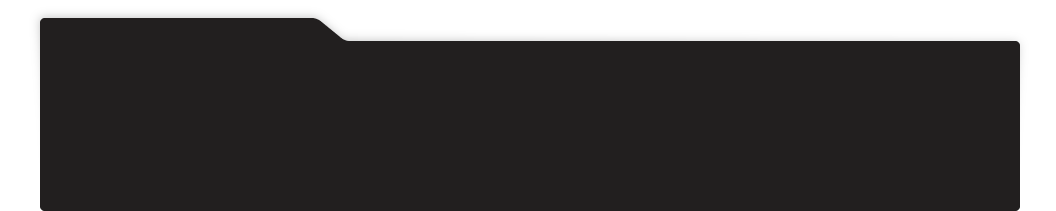
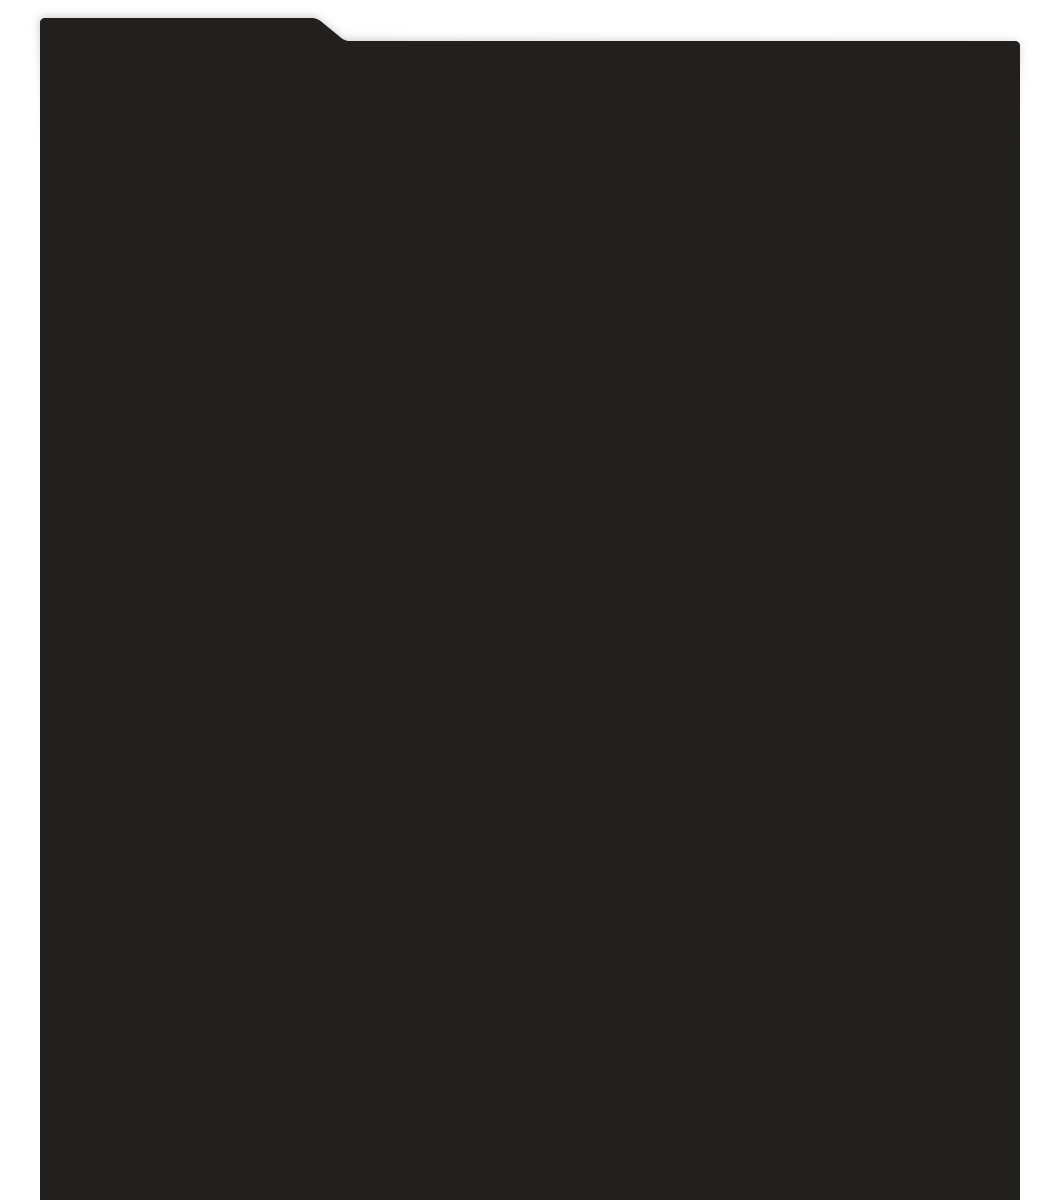
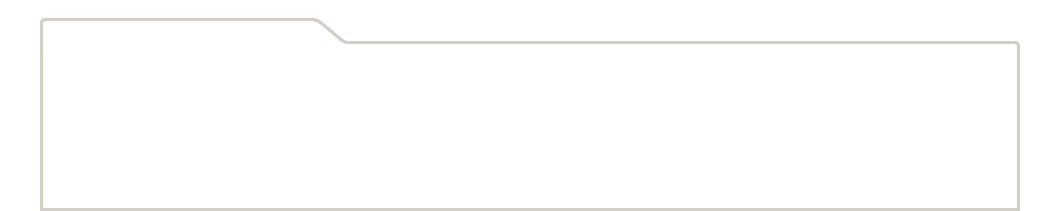
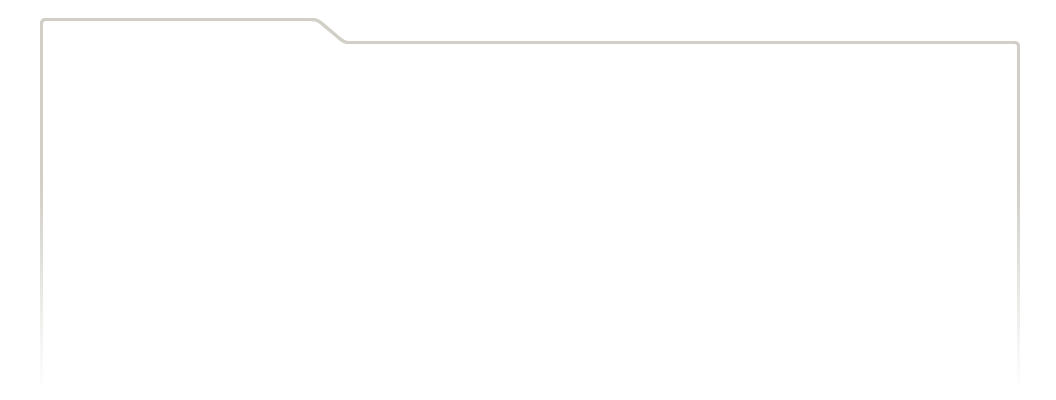
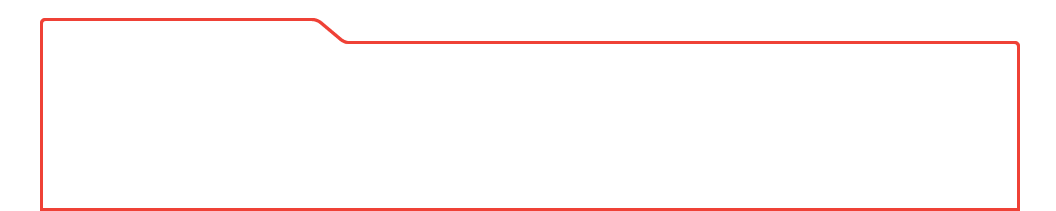
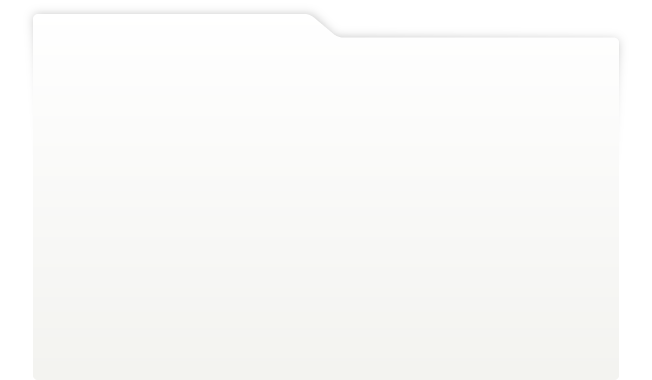
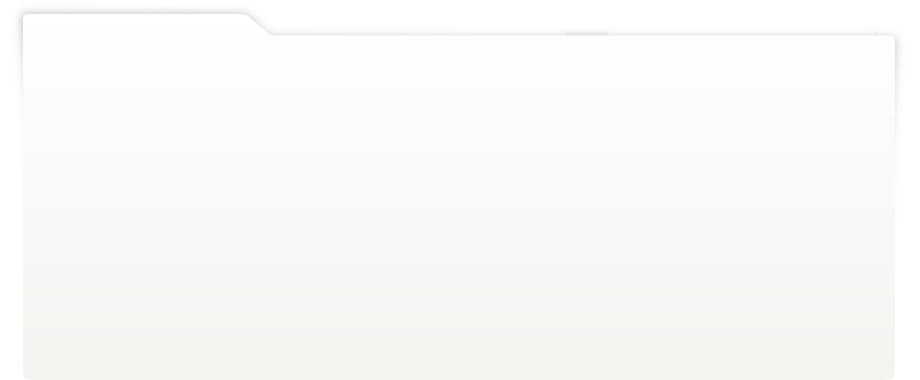
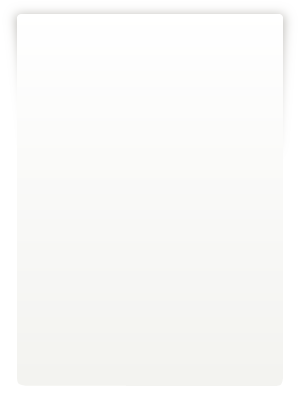
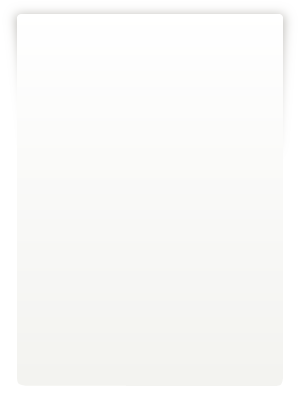
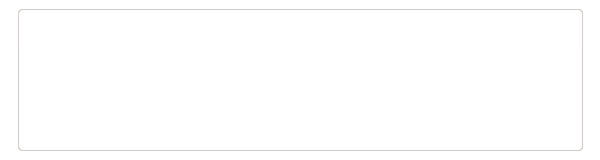
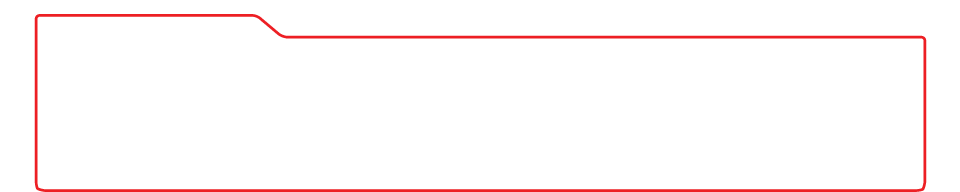
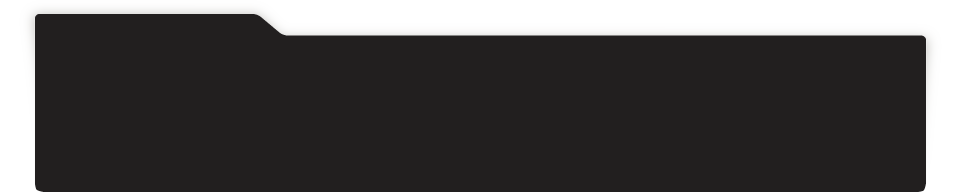
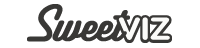
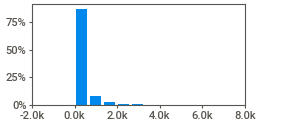
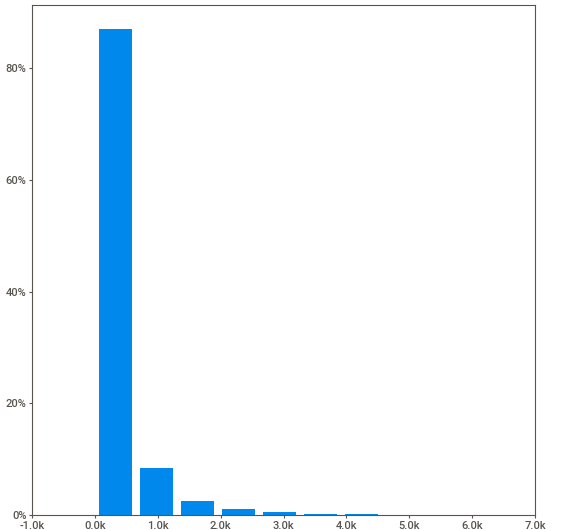
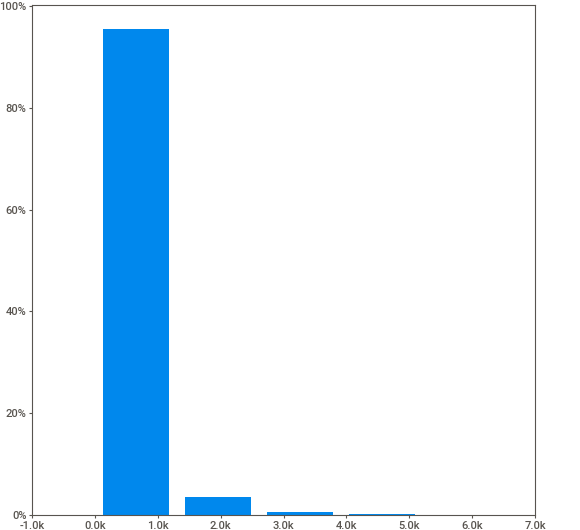
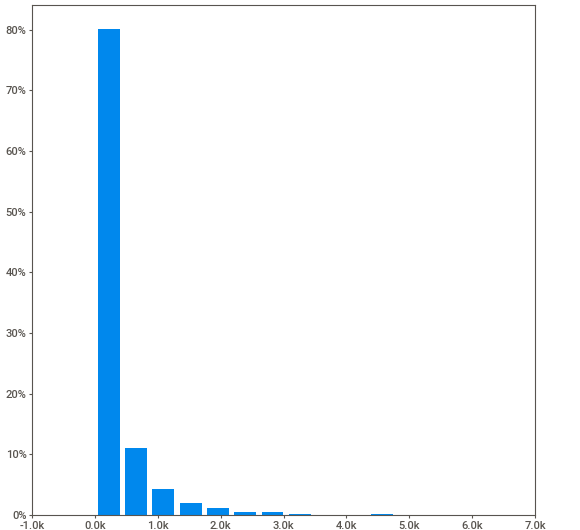
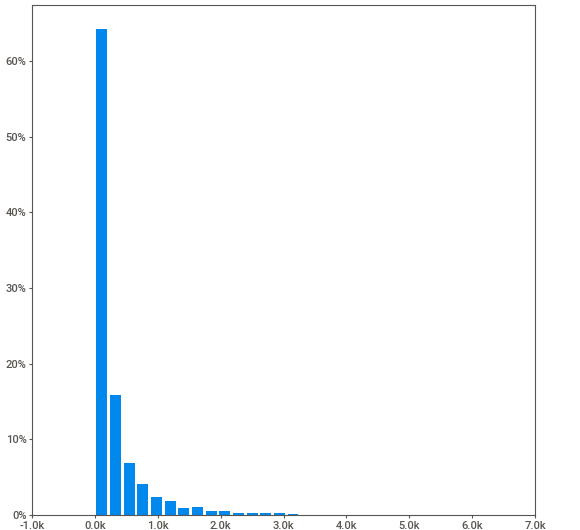
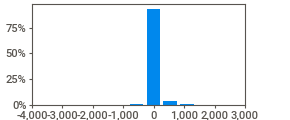
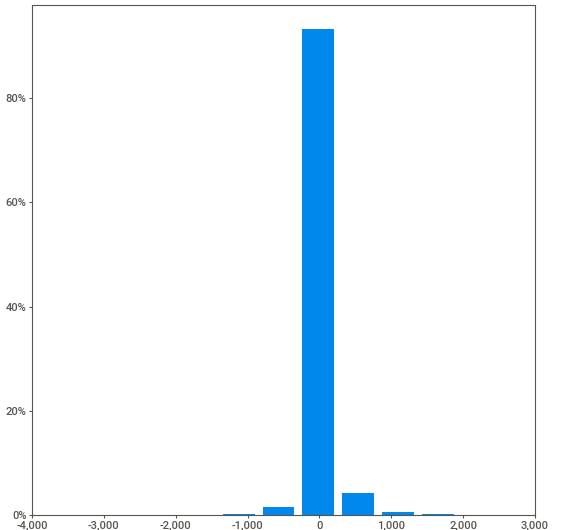
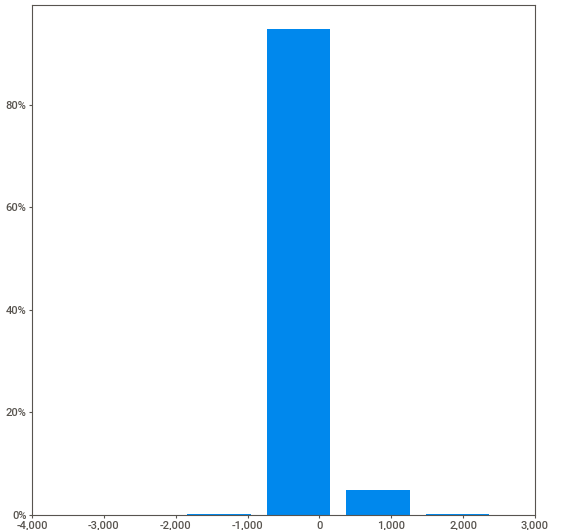
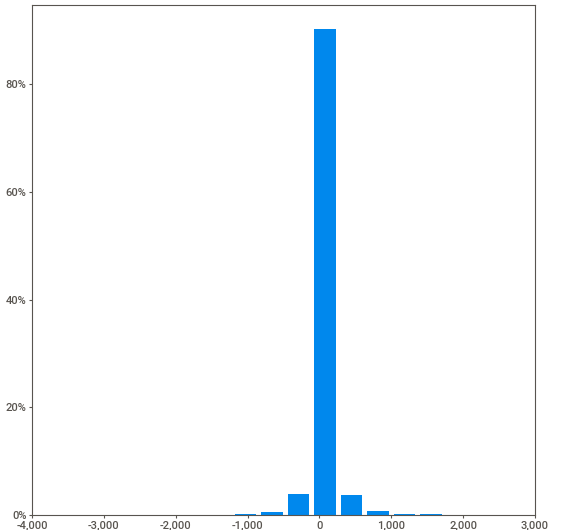
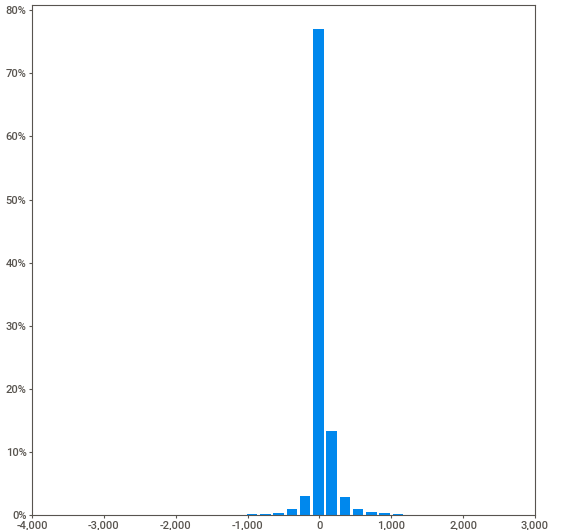
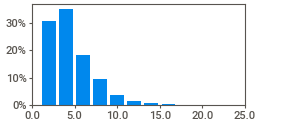
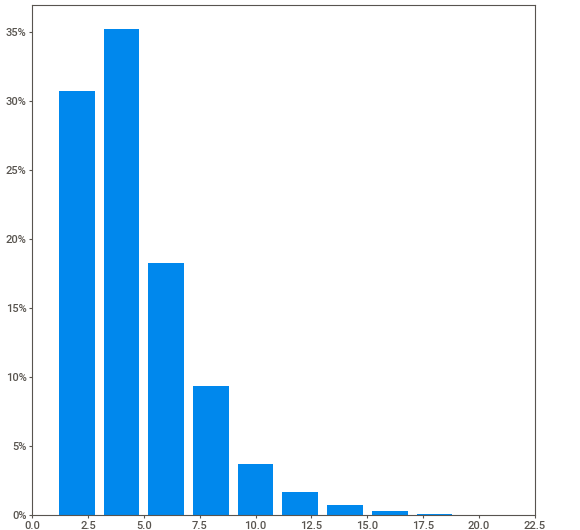
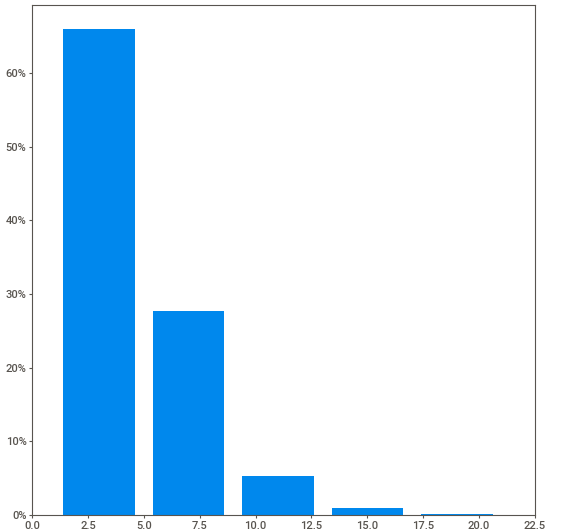
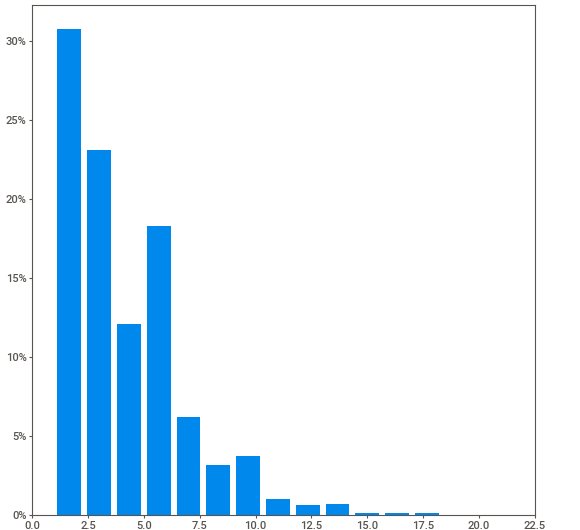
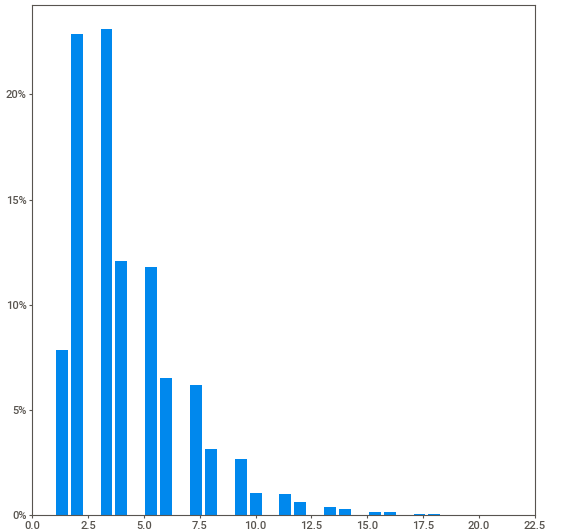
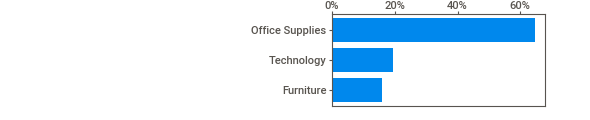
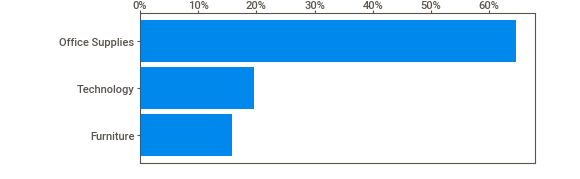
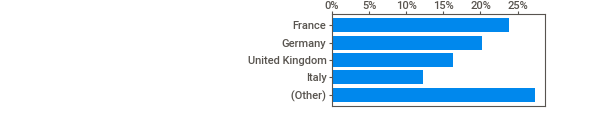
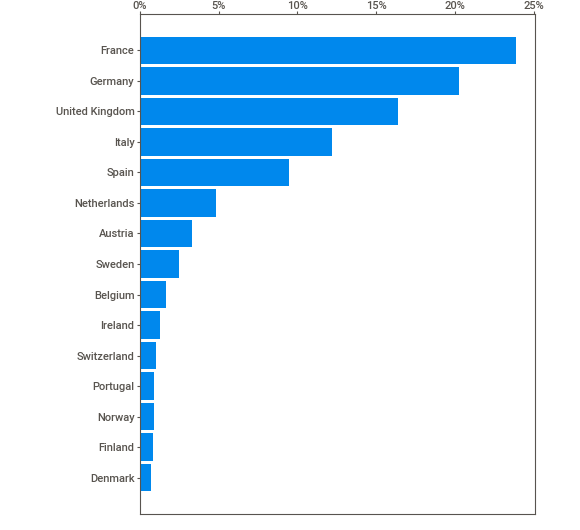
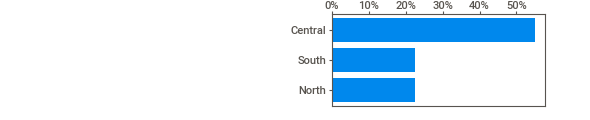
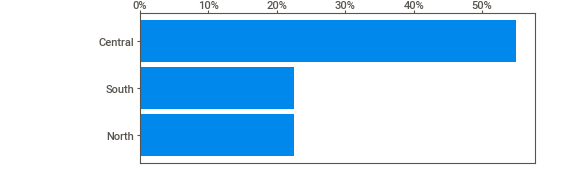
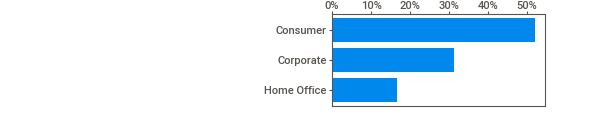
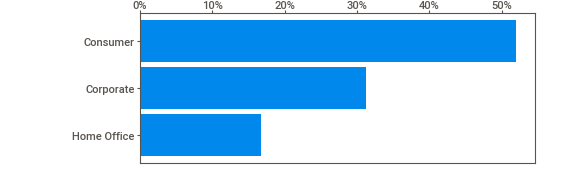
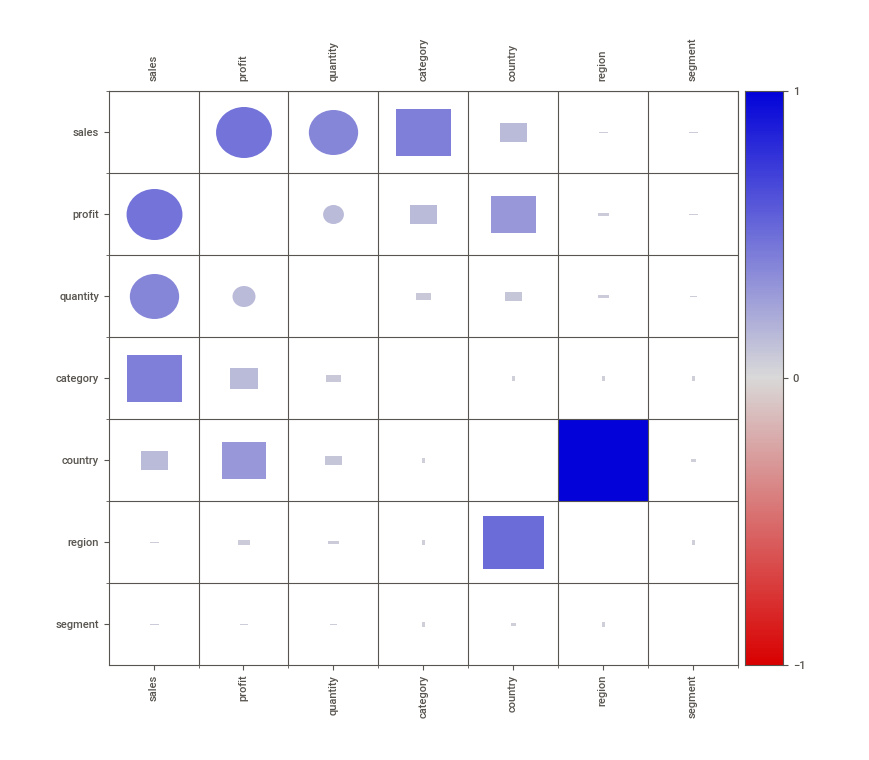
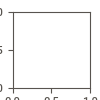

In [60]:
my_report.show_notebook()

In [63]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

ModuleNotFoundError: No module named 'wordcloud'

In [65]:
import plotly.express as px

In [69]:
px.scatter_mapbox(lat='lat', lon='lon').show()

ValueError: String or int arguments are only possible when a DataFrame or an array is provided in the `data_frame` argument. No DataFrame was provided, but argument 'lat' is of type str or int.